In [38]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread ("11.jpg")

In [39]:
def CalcOfDamageAndNonDamage (image_name):
    image = cv.imread(image_name)
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    image_erode = cv.erode(image, kernel)

    hsv_img = cv.cvtColor(image_erode, cv.COLOR_BGR2HSV)

    markers = np.zeros((image.shape[0], image.shape[1]), dtype = "int32")
    markers[90:140, 90:140] = 255
    markers[236:255, 0:20] = 1
    markers[0:20, 0:20] = 1
    markers[0:20, 236:255] = 1
    markers[236:255, 236:255] = 1
    leafs_area_BGR = cv.watershed(image_erode, markers)

    healthy_part = cv.inRange(hsv_img, (36, 25, 25), (86, 255, 255))
    ill_part = leafs_area_BGR - healthy_part
    
    mask = np.zeros_like(image, np.uint8)
    mask[leafs_area_BGR > 1] = (255, 0, 255)
    mask[ill_part > 1] = (0, 0, 255)
    return mask

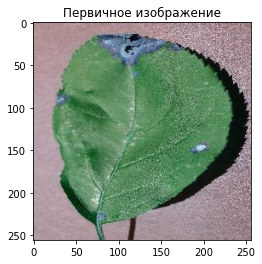

In [47]:
plt.imshow(img)
plt.title("Первичное изображение")
plt.show()

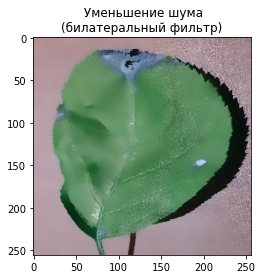

In [56]:
#Билатеральный фильтр
bilateral = cv.bilateralFilter(img, 15, 75, 75)
cv.imwrite("bilateral_filter.png", bilateral)
res_0 = cv.imread ("bilateral_filter.png")
plt.imshow(res_0)
plt.title(" Уменьшение шума\n(билатеральный фильтр)")
plt.show()

In [61]:
result_1 = CalcOfDamageAndNonDamage("11.jpg")

In [62]:
result_2 = CalcOfDamageAndNonDamage("bilateral_filter.png")

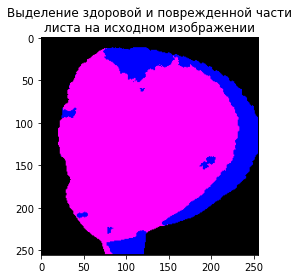

In [63]:
plt.imshow(result_1)
plt.title("Выделение здоровой и поврежденной части\nлиста на исходном изображении")
plt.show()

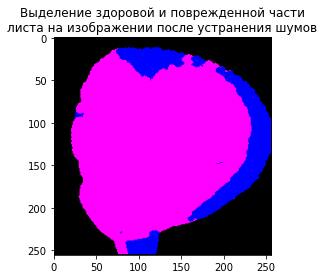

In [64]:
plt.imshow(result_2)
plt.title("Выделение здоровой и поврежденной части\nлиста на изображении после устранения шумов")
plt.show()

Итог
    
Поврежденные участки листа лучше выделять на первичном изображении. При выделении повреждений на изображении, где был уменьшен шум будут отображены только сильные повреждения листа, что исказит результаты. 